In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.interpolate import griddata
from scipy import interpolate
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
branchingfractions_dtf = pd.read_csv('BFCalc/darkSUSY_BFs/BranchingFactors.dat', delimiter='\t')


branchingfractions = np.squeeze(np.array(list(branchingfractions_dtf.iloc)))[1:]
branchingfractions[0]

'   10.000000000000000        1.0000000000000000E-003   0.0000000000000000        1.0378850333402099E-039   0.0000000000000000        4.4365241407128316E-035   0.0000000000000000        1.1961342122771007E-032   1.0731768960356099E-037   4.2927058455958298E-037   3.9703060050698629E-032   1.2648359410883450E-034   0.0000000000000000        1.8907702685825178E-031   0.0000000000000000        0.0000000000000000        0.0000000000000000        8.4828835412886705E-034   0.0000000000000000        0.0000000000000000        0.0000000000000000     '

In [2]:
variables = [channel.strip() for channel in branchingfractions_dtf.columns[0].split(' | ')]
variablesdict = {idx:channel.replace(' + ','').replace('bar','').replace('anti-','') for idx, channel in enumerate(variables)}
darkSUSYchannel_list = list(variablesdict.values())

In [3]:

splitBFs = [np.array(unsplitBF.split(' ')) for unsplitBF in branchingfractions]
splitBFs = np.array([splitBF[np.where(splitBF)] for splitBF in splitBFs]).astype(float)
np.sum(splitBFs[:,2:],axis=1).shape

(51106,)

In [4]:
channel_params = splitBFs[:,[0,1,15]]
channel_params[:,2] = channel_params[:,2]/(np.sum(splitBFs[:,2:],axis=1))

In [5]:
masses = np.unique(channel_params[:,0])
lambdas = np.unique(channel_params[:,1])

massgrid, lambdagrid = np.meshgrid(masses, lambdas, indexing='ij')
massgrid.max()/1e3

1046.9364459462731

In [6]:
zi = griddata((channel_params[:,0], channel_params[:,1]), channel_params[:,2], (massgrid, lambdagrid))

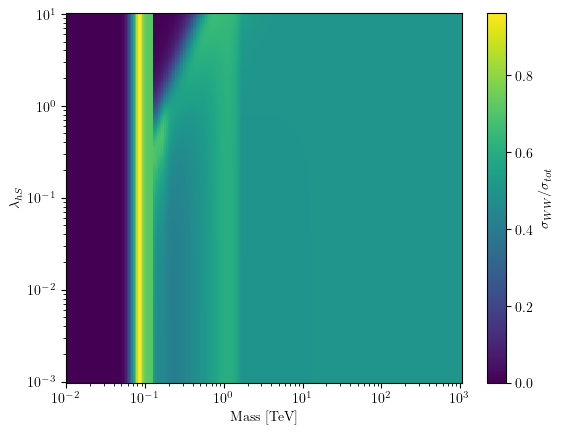

In [7]:
plt.figure()
plt.pcolormesh(masses/1000, lambdas, zi.T)#, norm=LogNorm(vmin=1e-2))
plt.colorbar(label=r'$\sigma_{WW}/\sigma_{tot}$')
plt.loglog()
plt.xlabel("Mass [TeV]")
plt.ylabel(r"$\lambda_{hS}$")
plt.show()

[]

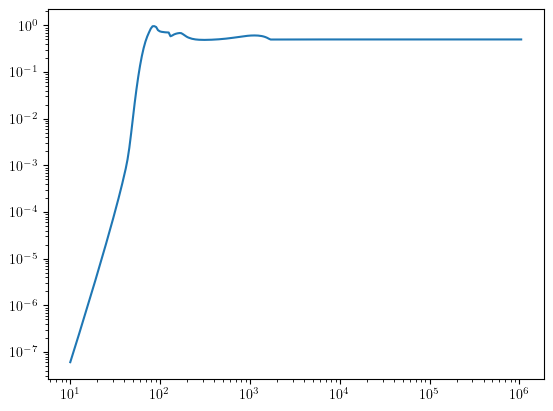

In [8]:
zi = griddata((channel_params[:,0], channel_params[:,1]), channel_params[:,2], (masses, masses*0+0.5))
zi = np.squeeze(zi)

plt.figure()
plt.plot(masses, zi)
plt.loglog()

In [9]:
splitBFs.shape

(51106, 21)

In [10]:
df = pd.DataFrame(splitBFs, columns=list(variablesdict.values()))
df.to_csv('BFCalc/darkSUSY_BFs/darkSUSY_BFs_cleaned.csv', index=True, header=True, sep=' ')

In [11]:
df.head()

,mS [GeV],lahS,nuenue,e+e-,numunumu,mu+mu-,nutaunutau,tau+tau-,uu,dd,...,ss,tt,bb,gammagamma,W+W-,ZZ,gg,HH,Zgamma,hadrons (below confinement scale)
0,10.000000,0.001,0.0,1.037885e-39,0.0,4.436524e-35,0.0,1.196134e-32,1.073177e-37,4.292706e-37,...,1.264836e-34,0.0,1.890770e-31,0.000000e+00,0.000000e+00,0.000000e+00,8.482884e-34,0.0,0.0,0.0
1,10.469364,0.001,0.0,1.043123e-39,0.0,4.393279e-35,0.0,1.214077e-32,1.078593e-37,4.314370e-37,...,6.854531e-35,0.0,1.602054e-31,9.126824e-36,1.497633e-38,4.921968e-39,4.920581e-33,0.0,0.0,0.0
2,10.960759,0.001,0.0,1.048910e-39,0.0,4.415623e-35,0.0,1.224938e-32,1.084576e-37,4.338304e-37,...,6.799670e-35,0.0,1.613466e-31,1.006735e-35,1.991383e-38,6.538493e-39,4.635692e-33,0.0,0.0,0.0
3,11.475218,0.001,0.0,1.055308e-39,0.0,4.441829e-35,0.0,1.236346e-32,1.091192e-37,4.364768e-37,...,6.751376e-35,0.0,1.622866e-31,1.110078e-35,2.647259e-38,8.679740e-39,4.374268e-33,0.0,0.0,0.0
4,12.013824,0.001,0.0,1.062388e-39,0.0,4.470025e-35,0.0,1.248342e-32,1.098514e-37,4.394053e-37,...,6.709502e-35,0.0,1.630465e-31,1.224071e-35,3.523847e-38,1.153861e-38,4.137802e-33,0.0,0.0,0.0


In [12]:
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0], channel_params[:,1]),splitBFs[:,15])

In [13]:
massvalues = np.unique(df.iloc[:,0])
lambdavalues = np.unique(df.iloc[:,1])

In [14]:
massvalues[0], channel_params[0,0]

(10.0, 10.0)

In [15]:
%%timeit
bfinterpolator(1.0, 0.1)

10.3 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


2 nuenue
3 e+e-
4 numunumu
5 mu+mu-
6 nutaunutau
7 tau+tau-
8 uu
9 dd
10 cc
11 ss
12 tt
13 bb
14 gammagamma
15 W+W-
16 ZZ
17 gg
18 HH
19 Zgamma
20 hadrons (below confinement scale)


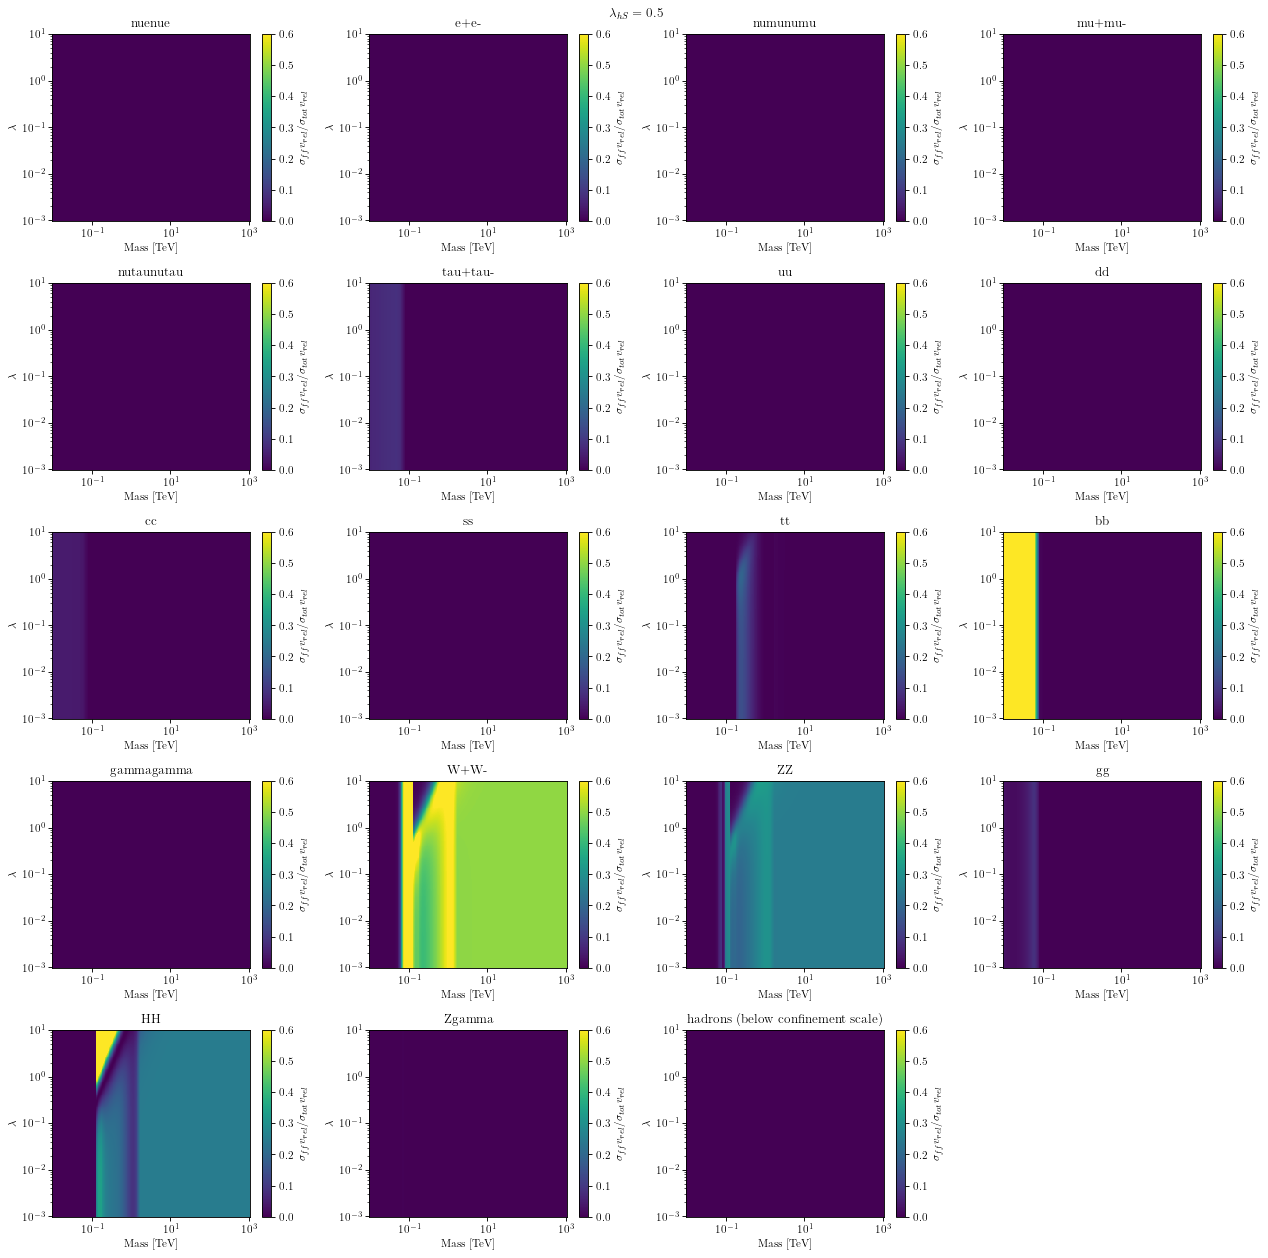

In [16]:
plt.figure(figsize=(16,16), dpi=80)
plt.suptitle(r"$\lambda_{hS}=0.5$")
massesabove0p1TeV = massvalues[massvalues>100]/1000
for idx, channel_name in enumerate(list(variablesdict.values())[2:]):
    print(idx+2, channel_name)
    plt.subplot(5,4, idx+1)
    plt.title(f"{channel_name}")
    plt.pcolormesh(massvalues/1000, lambdavalues, 
                   (splitBFs[:,idx+2]/np.sum(splitBFs[:,2:],axis=1)).reshape(lambdavalues.shape[0], massvalues.shape[0]), vmin=0, vmax=0.6)#,
                #    norm=LogNorm(vmin=1e-50))
    plt.xlabel('Mass [TeV]')
    plt.ylabel('$\lambda$')
    plt.loglog()
    plt.colorbar(label=r'$\sigma_{ff} v_{rel}/\sigma_{tot} v_{rel}$')
plt.tight_layout()
plt.show()

In [17]:
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0], channel_params[:,1]),splitBFs[:,15])

In [18]:
bfinterpolator(1.0, 0.5)

array(nan)

In [19]:
splitBFs[:,15][np.abs(channel_params[:,0]-1.0).argmin()]

0.0

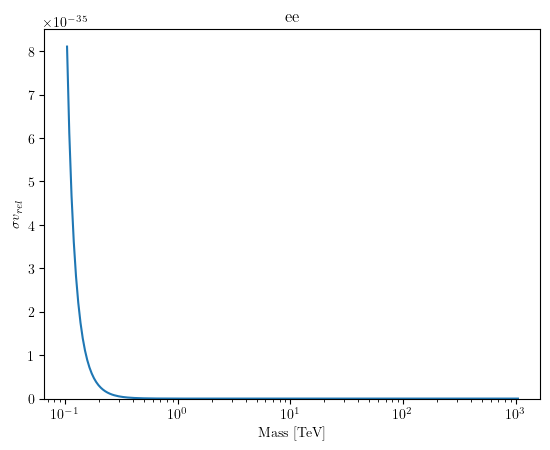

In [20]:
plt.title(f"ee")
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0]/1000, channel_params[:,1]),splitBFs[:,3])
plt.plot(massesabove0p1TeV, bfinterpolator(massesabove0p1TeV, 0.5))
plt.xlabel('Mass [TeV]')
plt.ylabel('$\sigma v_{rel}$')
plt.ylim([1e-50,None])
plt.xscale('log')

In [42]:
import sys
from gammapy.astro.darkmatter import (
    profiles,
    JFactory
)
from astropy import units as u
from astropy.coordinates import SkyCoord
from gammapy.maps import Map, MapAxis, MapAxes, WcsGeom
from utils3d import log10eaxistrue, longitudeaxistrue, latitudeaxistrue, aefffull, aeff_efficient
bfinterpolator = interpolate.LinearNDInterpolator((channel_params[:,0], channel_params[:,1]),splitBFs[:,15])




profile = profiles.EinastoProfile()

# Adopt standard values used in HESS
profiles.DMProfile.DISTANCE_GC = 8.5 * u.kpc
profiles.DMProfile.LOCAL_DENSITY = 0.39 * u.Unit("GeV / cm3")

profile.scale_to_local_density()

position = SkyCoord(0.0, 0.0, frame="galactic", unit="deg")
geom = WcsGeom.create(skydir=position, 
                      binsz=longitudeaxistrue[1]-longitudeaxistrue[0],
                      width=(longitudeaxistrue[-1]-longitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0], latitudeaxistrue[-1]-latitudeaxistrue[0]+longitudeaxistrue[1]-longitudeaxistrue[0]),
                      frame="galactic")


jfactory = JFactory(
    geom=geom, profile=profile, distance=profiles.DMProfile.DISTANCE_GC
)
jfact = jfactory.compute_differential_jfactor().to(u.TeV**2/(u.sr*u.cm**5)).value


partial_sigmav_interpolator_dictionary = {channel: interpolate.LinearNDInterpolator((channel_params[:,0]/1000, channel_params[:,1]),splitBFs[:,idx+2]) for idx, channel in enumerate(list(variablesdict.values())[2:])}
print(partial_sigmav_interpolator_dictionary)
jfactory.compute_differential_jfactor().unit



{'nuenue': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa1a9283940>, 'e+e-': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa1a9495d30>, 'numunumu': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa16bd6fc10>, 'mu+mu-': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa16bd6f700>, 'nutaunutau': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa1a8ebd700>, 'tau+tau-': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa1a8ebdb50>, 'uu': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa1a8ebd490>, 'dd': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa16bd9d2e0>, 'cc': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa1a8ed6940>, 'ss': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa1a8ed6c70>, 'tt': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x7fa1a94c02b0>, 'bb': <scipy.interpolate.interpnd.LinearNDInterpolator object at 0x

Unit("GeV2 / (cm5 sr)")

In [43]:
from BFCalc.createspectragrids import singlechannel_diffflux

darkSUSY_to_Gammapy_converter = {
    "nuenue":"nu_e",
    "e+e-": "e",
    "numunumu":"nu_mu",
    "mu+mu-":"mu",
    'nutaunutau':"nu_tau",
    "tau+tau-":"tau",
    "cc": "c",
    "bb": "b",
    "tt": "t",
    "W+W-": "W",
    "ZZ": "Z",
    "gg": "g",
    "gammagamma": "gamma",
    "HH": "h",
}


    

In [51]:
def calc_signal_fraction(log10eaxis, longitudeaxis, latitudeaxis, mass, coupling, partial_sigmav_interpolator_dictionary, aeff, diff_J_factor_grid, energy_spectra_dictionary, tobs, numevents):
    from scipy.integrate import simpson
    
    logenergymesh, longitudemesh, latitudemesh = np.meshgrid(log10eaxis, longitudeaxis, latitudeaxis, indexing='ij')
    truecoords = np.array([longitudemesh.flatten(), latitudemesh.flatten()])
    offsets  = np.linalg.norm(truecoords, axis=0)
    
    
    aeff_values  = aeff(logenergymesh.flatten(), offsets).reshape(logenergymesh.shape)
    
    channels = partial_sigmav_interpolator_dictionary.keys()
    
    
    
    singlechannel_energyspectra = {channel:energy_spectra_dictionary[channel](np.log10(mass), np.log10(mass)-logenergymesh.flatten()).reshape(logenergymesh.shape) for channel in channels}
    

    
    partial_sigmav_dictionary = {channel:partial_sigmav_interpolator_dictionary[channel](mass, coupling) for channel in channels}
    single_channel_flux_grid = {channel:aeff_values*diff_J_factor_grid*singlechannel_energyspectra[channel] for channel in channels}
    
    single_channel_integrated = {channel:simpson(y=simpson(y=simpson(single_channel_flux_grid[channel], x=10**log10eaxis, axis=0), x=longitudeaxis, axis=0), x=latitudeaxis, axis=0) for channel in channels}

    # Terms that don't depend on energy or sky position
    signalfraction = tobs/(4*np.pi*mass*numevents)
    
    
    # Including the integrated terms that depend on energy and sky position
    signalfraction = signalfraction*np.sum([partial_sigmav_dictionary[channel]*single_channel_integrated[channel] for channel in channels])
    
    return signalfraction

In [52]:
from BFCalc.createspectragrids import singlechannel_diffflux

darkSUSY_to_Gammapy_converter = {
    "nuenue":"nu_e",
    "e+e-": "e",
    "numunumu":"nu_mu",
    "mu+mu-":"mu",
    'nutaunutau':"nu_tau",
    "tau+tau-":"tau",
    "cc": "c",
    "bb": "b",
    "tt": "t",
    "W+W-": "W",
    "ZZ": "Z",
    "gg": "g",
    "gammagamma": "gamma",
    "HH": "h",
}


    

In [53]:
channelfuncdictionary = {}
modulefolderpath = 'BFCalc'
massvalues          = np.load(modulefolderpath+f"/griddata/massvals_massenergy_diffflux_grid.npy")/1e3
log10xvals        = np.load(modulefolderpath+f"/griddata/log10xvals_massenergy_diffflux_grid.npy")

for darkSUSYchannel in darkSUSYchannel_list:
    try:
        gammapychannel = darkSUSY_to_Gammapy_converter[darkSUSYchannel]
        tempspectragrid = np.load(modulefolderpath+f"/griddata/channel={gammapychannel}_massenergy_diffflux_grid.npy")
        channelfuncdictionary[darkSUSYchannel] = interpolate.interp2d(np.log10(massvalues), log10xvals, np.array(tempspectragrid).T, 
                                    kind='linear', bounds_error=False, fill_value=1e-3000)
    except:
        channelfuncdictionary[darkSUSYchannel] = lambda logmass, log10x: log10x*0
    
channelfuncdictionary['W+W-'](0, -log10eaxistrue.flatten()).reshape(log10eaxistrue.shape)

array([2.15369780e+00, 2.10346186e+00, 2.05322592e+00, 2.00298998e+00,
       1.95275404e+00, 1.90251810e+00, 1.85679915e+00, 1.81108020e+00,
       1.76536126e+00, 1.71964231e+00, 1.67392336e+00, 1.63245851e+00,
       1.59099367e+00, 1.54952883e+00, 1.50806398e+00, 1.46659914e+00,
       1.42887595e+00, 1.39115275e+00, 1.35342956e+00, 1.31570637e+00,
       1.27798318e+00, 1.24414456e+00, 1.21030594e+00, 1.17646732e+00,
       1.14262870e+00, 1.10879008e+00, 1.07857125e+00, 1.04835243e+00,
       1.01813360e+00, 9.87914779e-01, 9.57695955e-01, 9.30870802e-01,
       9.04045649e-01, 8.77220496e-01, 8.50395344e-01, 8.23570191e-01,
       7.99892973e-01, 7.76215755e-01, 7.52538537e-01, 7.28861319e-01,
       7.05184102e-01, 6.84370573e-01, 6.63557045e-01, 6.42743516e-01,
       6.21929988e-01, 6.01116459e-01, 5.82804960e-01, 5.64493460e-01,
       5.46181961e-01, 5.27870462e-01, 5.09558962e-01, 4.93686519e-01,
       4.77814075e-01, 4.61941631e-01, 4.46069187e-01, 4.30196743e-01,
      

In [55]:
%%timeit

calc_signal_fraction(log10eaxistrue, longitudeaxistrue, latitudeaxistrue, 1.0, 0.1, partial_sigmav_interpolator_dictionary, aeff_efficient, jfact.T, channelfuncdictionary, 525*60*60, 1e8)

357 ms ± 6.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
